
## DAV 6150 Module 2 Assignment


-by Qi Sun

***

### Introduction:

The purpose of this project is to examine  factors that can predict the net hourly electrical energy output of the plant. The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. 

**Research Question:**

This study was guided by the research question - To what extent does independent variables predict the net hourly electrical energy output of the Plant?


**Variables:**

The following factors are used as independent variables:
* Ambient Temperature (T)
* Ambient Pressure (AP)
* Relative Humidity (RH)  
* Exhaust Vacuum (V)

The dependent variable is net hourly electrical energy output of the Plant. 


**Procedures:**

Here are main procedures of the analysis:
- **Step 1**: Load data
- **Step 2**: Perform Exploratory Data Analysis
- **Step 3**: Conduct Linear Regression and model evaluation
- **Step 4**: Conclusion

> For Step 2, the main components of EDA include:
- Understand variables
- Clean dataset
- Analyze relationships between variables

> For Step 3, it consists of 3 stages:
- (1) Construct linear regression models by using different features
- (2) Model evaluation using 5-fold Cross Validation
- (3) Choose the model with the highest average accuracy scores derived from the 5-fold process

***

In [265]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


***
### Step 1: Load data into the data frame from GitHub

`.head()` returns the first 5 rows of the dataset. 

`.tail()` returns the last 5 rows of the dataset. 


In [81]:
data = pd.read_csv("https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/M2/M2_Data.csv")

# To display the top 5 rows
data.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [180]:
# To display the bottom 5 rows
data.tail() 

,T,V,AP,RH,EP
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


***
### Step 2: Exploratory Data Analysis

In this case, the procedures of Exploratory Data Analysis consist of:
1. Description of data
2. Rename the columns
3. Check the data types
4. Check the missing or null values
5. Detect and remove Outliers
6. Check distribution
7. Analyze relationships between variables


#### 1. Description of data:
`.shape` returns the number of rows by the number of columns for the dataset. My output was (9568, 5), meaning the dataset has 9568 rows and 5 columns.

`.columns` returns the name of all of the columns in the dataset.

`.nunique(axis=0)` returns the number of unique values for each variable.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 


In [83]:
# Size of the dataset:
data.shape

(9568, 5)

In [84]:
# display column names
data.columns

Index(['T', 'V', 'AP', 'RH', 'EP'], dtype='object')

In [182]:
# unique value
data.nunique(axis=0)

T     2773
V      634
AP    2517
RH    4546
EP    4836
dtype: int64

In [85]:
# Statistical Summary of Numeric Variables:
data.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### 2. Renaming the columns

The column names are confusing to read, so I just tweak their column names, which would improve the readability of the dataset.

In [86]:
# Renaming the column names
df = data.rename(columns={'T': 'Temperature', 
                        'V': 'ExhaustVacuum', 
                        'AP': 'AmbientPressure', 
                        'RH': 'RelativeHumidity',
                        'EP': 'output'})

df.head(5)

,Temperature,ExhaustVacuum,AmbientPressure,RelativeHumidity,output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### 3. Checking the types of data

In this case, the types of data are already in integer format.


In [87]:
# Checking the data type
df.dtypes

Temperature         float64
ExhaustVacuum       float64
AmbientPressure     float64
RelativeHumidity    float64
output              float64
dtype: object

#### 4. Checking the missing or null values.

There is no missing or null value, so I don't need to remove or replace any mssing/null values.


In [88]:
# Finding the null values.
print(df.isnull().sum())


Temperature         0
ExhaustVacuum       0
AmbientPressure     0
RelativeHumidity    0
output              0
dtype: int64


#### 5. Detecting and removing Outliers

I use visualization tool - Box plot to discover outliers. If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.

Shown below are the box plot of Temperature, Exhaust Vacuum, Ambient Pressure, Relative Humidity, and Net hourly electrical energy output of the Plant. You can see that there are a number of outliers for Ambient Pressure and for Relative Humidity.


Text(0.5, 1.0, 'Box Plot of Net hourly electrical energy output')

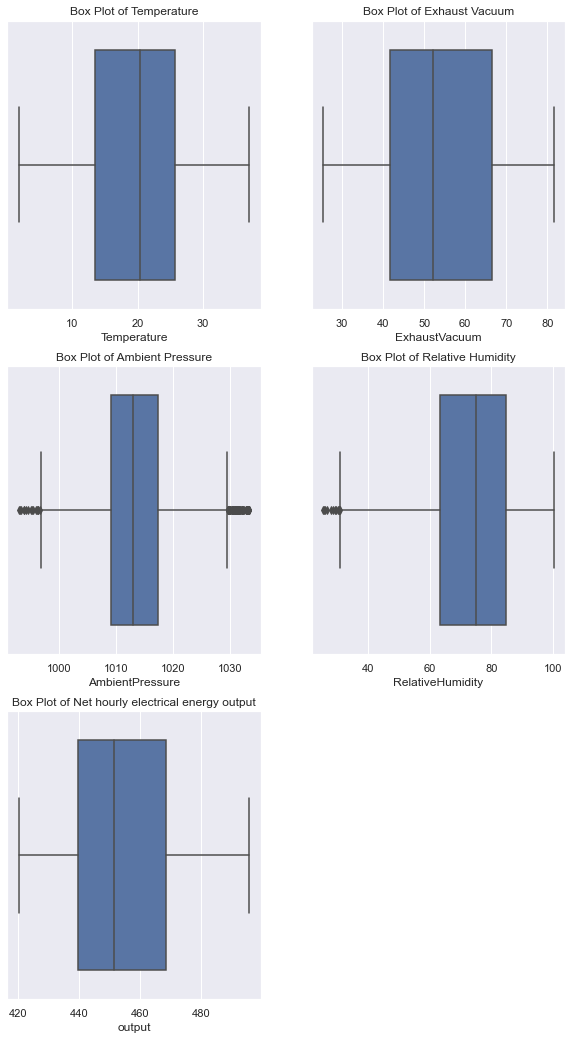

In [27]:
plt.figure(figsize=(10,18))

# Boxplot of Temperature
plt.subplot(321)
sns.boxplot(x=df['Temperature'])
plt.title('Box Plot of Temperature')

# Boxplot of Exhaust Vacuum 
plt.subplot(322)
sns.boxplot(x=df['ExhaustVacuum'])
plt.title('Box Plot of Exhaust Vacuum')

# Boxplot of Ambient Pressure 
plt.subplot(323)
sns.boxplot(x=df['AmbientPressure'])
plt.title('Box Plot of Ambient Pressure')

# Boxplot of Relative Humidity 
plt.subplot(324)
sns.boxplot(x=df['RelativeHumidity'])
plt.title('Box Plot of Relative Humidity')

# Boxplot of Net hourly electrical energy output 
plt.subplot(325)
sns.boxplot(x=df['output'])
plt.title('Box Plot of Net hourly electrical energy output')


The outlier removing that I am going to perform is called **IQR** (interquartile range) score technique. 

Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Here we will get IQR for each column:

In [89]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Temperature         12.2100
ExhaustVacuum       24.8000
AmbientPressure      8.1600
RelativeHumidity    21.5025
output              28.6800
dtype: float64


In [90]:
df02 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df02.shape

(9468, 5)

In [92]:
df02.describe()

,Temperature,ExhaustVacuum,AmbientPressure,RelativeHumidity,output
count,9468.000000,9468.00000,9468.000000,9468.000000,9468.000000
mean,19.719883,54.41369,1013.148802,73.322083,454.209298
std,7.427311,12.70141,5.704623,14.551203,17.029285
min,1.810000,25.36000,996.870000,31.150000,420.260000
25%,13.577500,41.74000,1009.090000,63.285000,439.697500
50%,20.500000,52.72000,1012.900000,74.980000,451.210000
75%,25.760000,66.54000,1017.170000,84.840000,468.190000
max,37.110000,81.56000,1029.410000,100.160000,495.760000


As seen above there were 100 rows were outliers and removed. 

Before removing outliers, the range of AmbientPressure is 992.89 - 1033.3.
After outliers were removed, the range of AmbientPressure is 996.87 - 1029.42.

For RelativeHumidity, the max is unchanged but the min was changed from 25.56 to 31.15.


#### 6. Checking distribution - Histogram

Next, I'll check the distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right).

Below are histograms of Temperature, Exhaust Vacuum, Ambient Pressure, Relative Humidity, and Net hourly electrical energy output of the Plant (output). 

- The Ambient Pressure is normal distribution.
- The distribution of Relative Humidity has a negative skew (left-skewed distribution). The median is larger than the mean.
- The distribution of electrical energy output of the Plant has a positive skew (right-skewed distribution). The mean is larger than the median.
- The Temperature and Exhaust Vacuum are kind of normal distribution.




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bf36b90>,
      dtype=object)

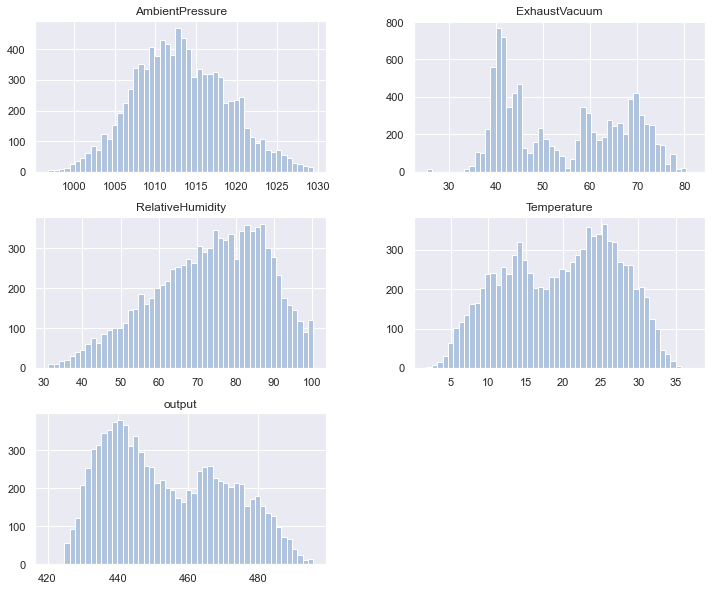

In [185]:
df02.hist(bins=50, color='lightsteelblue', figsize=(12,10))

#### 7. Analyzing relationships between variables with two methods - `sns.heatmap()` and `sns.regplot`

##### a. Correlation Matrix - Heat Map

Correlation is a measurement that describes the relationship between two variables.

Correlation matrix is a table that shows the Pearson correlation coefficients (Pearson's r) between many variables. I'll use `sns.heatmap()` to plot a correlation matrix of all of the variables in the dataset.


Text(0.5, 1.0, 'Figure 6a: Correlations')

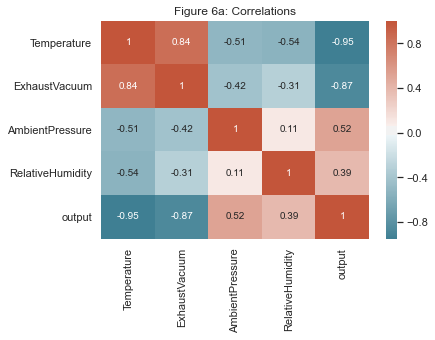

In [61]:
# calculate correlation matrix
corr = df02.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 6a: Correlations')


##### b. Plots of Electric Energy Output of the Plant vs. Other Variables in the Dataset
I'll use `sns.regplot` to display the relationships between independent variables and dependent variable.

Seaborn calculates and plots a linear regression model fit, along with a translucent 95% confidence interval band. 

Text(0.5, 1.0, 'Figure 7.4: Relative Humidity vs. output')

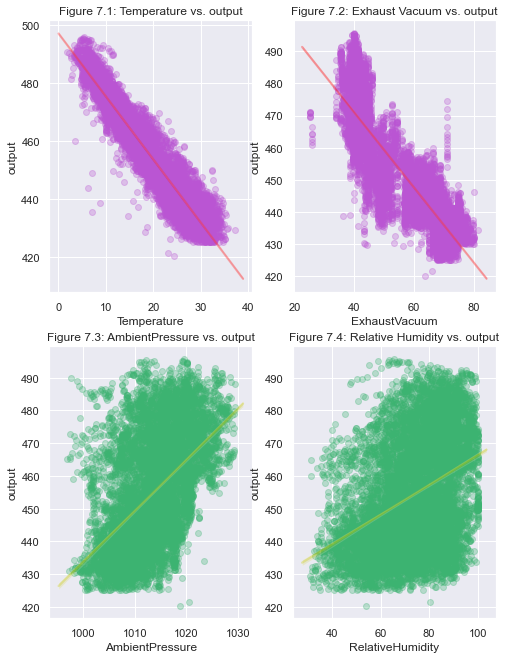

In [197]:
plt.figure(figsize=(8,11))

# Plot a relationship between two variables
plt.subplot(221)
sns.regplot(x="Temperature", y="output",data=df02, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.1: Temperature vs. output')

plt.subplot(222)
sns.regplot(x="ExhaustVacuum", y="output",data=df02, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.2: Exhaust Vacuum vs. output')

plt.subplot(223)
sns.regplot(x="AmbientPressure", y="output",data=df02, scatter_kws = {'color': 'mediumseagreen', 'alpha': 0.3}, line_kws = {'color': '#CCCC00','alpha': 0.3})
plt.title('Figure 7.3: AmbientPressure vs. output')

plt.subplot(224)
sns.regplot(x="RelativeHumidity", y="output",data=df02, scatter_kws = {'color': 'mediumseagreen', 'alpha': 0.3}, line_kws = {'color': '#CCCC00','alpha': 0.3})
plt.title('Figure 7.4: Relative Humidity vs. output')


##### Results: 
We can see that there is a positive correlation between electrical energy output of the Plant and Ambient Pressure (r=0.52), and a positive correlation between electrical energy output of the Plant and Relative Humidity (r=0.39) . 
More Ambient Pressure and more Relative Humidity will have more Net hourly electrical energy output of the Plant.

We can also see that there is a negative correlation between electrical energy output of the Plant and Temperature (r= -0.95) — the higher the Temperature the less number of Net hourly electrical energy output of the Plant. Also, the electrical energy output of the Plant is negatively correlated with Exhaust Vacuum (r= -0.87) - the more Exhaust Vacuum the less number of Net hourly electrical energy output of the Plant.

***

### Step 3: Linear Regression - Multiple Linear Regression


One of the requirement of this study is that models must include at least 2 explanatory variables. Therefore, I'll conduct multiple linear regression to predict the electrical energy output of the Plant :

> $y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

* $y$ is the response
* $x_1 ... x_n$ is the features
* $\beta_0$ is the intercept
* $\beta_1 ... \beta_n$ is the coefficients for x

#### The procedures of this step include:
- 1. Check for Multicollinearity
- 2. Split data into training and testing subsets
- 3. Model selection - Choose the Best Model using k-fold cross-validation
- 4. Test the model to predict using the test dataset
- 5. Use Statsmodels to get the best model's P-value, $R^2$, intercept, and coefficients.
- 6. Use the final Model for Prediction


#### 1. Check for Multicollinearity

Multicollinearity refers to when your predictor variables are strongly correlated with each other. A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. Either one of strongly correlated variables should be removed from the regression model.

**Correlation Matrix** is a good indicator of multicollinearity and indicate the need for further investigation. 

From the Correlation Matrix that I did above, Temperature and ExhaustVacuum are highly correlated with each other (r=0.84). Therefore, I need to delete either 'Temperature' or 'ExhaustVacuum' for the further regression analysis.



#### 2. Split data into training and testing subsets

Now I use the `train_test_split` function in order to make the split. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing. It’s 70/30, 30% of the data for testing.

In [193]:
# Create a copy of the dataset
df03 = df02.copy()

In [194]:
# Create X and y
feature_cols = ['Temperature','AmbientPressure','RelativeHumidity','ExhaustVacuum']

X = df03[feature_cols]
y = df03[['output']]


In [110]:
# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


In [225]:
# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)


Training dataset shape: (6627, 4) (6627, 1)
Testing dataset shape: (2841, 4) (2841, 1)


#### 3. Model selection - Choose the Best Model using k-fold cross-validation

##### Requirements of constructing a regression model:
1) include at least two explanatory variables; 

2) Temperature and ExhaustVacuum cannot exist in the same model since they are strongly correlated with each other (r=0.84);

3) AmbientPressure and RelativeHumidity have the least correlations with the dependent variable, so I'll give up the model of AmbientPressure + RelativeHumidity.

##### Models:

>- model01 = Temperature + AmbientPressure + RelativeHumidity + ExhaustVacuum (Build full model on ALL features for comparison)

>- model02 = Temperature + AmbientPressure + RelativeHumidity
>- model03 = AmbientPressure + RelativeHumidity + ExhaustVacuum
>- model04 = Temperature + AmbientPressure
>- model05 = Temperature + RelativeHumidity
>- model06 = AmbientPressure + ExhaustVacuum

**k-fold cross-validation**. 

The `cross_val_score` is the function of the model selection and evaluate a score by cross-validation. I use **5-fold cross-validation model** that divides the training set into 5-folds and the model is trained a four-fold and tested on the last remaining fold. I'll use the average accuracy scores derived from the 5-fold process to compare the models and select the best model.

There are some parameters in `cross_val_score` function. In this case:
- The first parameter the estimator is equal to the LinearRegression. 
- The second and third parameter datasets are X_train and y_train, respectively because I apply the k-fold cross-validation method to the training dataset. 
- The fourth parameter is cv and it is equal to 5 and this means it gets 5 accuracies and actually enough to get a relevant idea of the model performance.

In [258]:
# Build full model on ALL features, for comparison
# model01 = Temperature + AmbientPressure + RelativeHumidity + ExhaustVacuum
# Instantiate model
model01 = LinearRegression()

# fit the model using 5-fold cross validation
scores01 = cross_val_score(model01, X_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores01)

# calculate the average accuracy across all 5 folds
print('Mean Accuracy:', np.mean(scores01))


[0.9306996  0.92831826 0.92902656 0.92969396 0.92964883]
Mean Accuracy: 0.929477443057206


In [259]:
# model02 = Temperature + AmbientPressure + RelativeHumidity
X_train02 = X_train[['Temperature','AmbientPressure','RelativeHumidity']].copy()

# Instantiate model
model02 = LinearRegression()

# fit the model using 5-fold cross validation
scores02 = cross_val_score(model02, X_train02, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores02)

# calculate the average accuracy across all 5 folds
print('Mean Accuracy:', np.mean(scores02))


[0.92642767 0.92115381 0.92085761 0.92360049 0.91956143]
Mean Accuracy: 0.9223202049207881


In [260]:
# model03 = AmbientPressure + RelativeHumidity + ExhaustVacuum
X_train03 = X_train[['ExhaustVacuum','AmbientPressure','RelativeHumidity']].copy()

# Instantiate model
model03 = LinearRegression()

# fit the model using 5-fold cross validation
scores03 = cross_val_score(model03, X_train03, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores03)

# calculate the average accuracy across all 5 folds
print('Mean Accuracy:', np.mean(scores03))

[0.79516175 0.80565264 0.80762323 0.79166379 0.8101526 ]
Mean Accuracy: 0.8020508010227282


In [266]:
# model04 = Temperature + AmbientPressure
X_train04 = X_train[['Temperature','AmbientPressure']].copy()

# Instantiate model
model04 = LinearRegression()

# fit the model using 5-fold cross validation
scores04 = cross_val_score(model04, X_train04, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores04)

# calculate the average accuracy across all 5 folds
print('Mean Accuracy:', np.mean(scores04))


[0.90582696 0.9044129  0.90113923 0.90292985 0.89536914]
Mean Accuracy: 0.901935616244512


In [267]:
# model05 = Temperature + RelativeHumidity
X_train05 = X_train[['Temperature','RelativeHumidity']].copy()

# Instantiate model
model05 = LinearRegression()

# fit the model using 5-fold cross validation
scores05 = cross_val_score(model05, X_train05, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores05)

# calculate the average accuracy across all 5 folds
print('Mean Accuracy:', np.mean(scores05))

[0.9262657  0.92087367 0.92113822 0.92331259 0.91966645]
Mean Accuracy: 0.9222513255160536


In [268]:
# model07 = AmbientPressure + ExhaustVacuum
X_train06 = X_train[['AmbientPressure','ExhaustVacuum']].copy()

# Instantiate model
model06 = LinearRegression()

# fit the model using 5-fold cross validation
scores06 = cross_val_score(model06, X_train06, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores06)

# calculate the average accuracy across all 5 folds
print('Mean Accuracy:', np.mean(scores06))

[0.77444408 0.78819441 0.78654572 0.78394335 0.79053702]
Mean Accuracy: 0.7847329155738849


In [271]:
print('model01-cross validated accuracy:',np.mean(scores01)*100, '%')
print('model02-cross validated accuracy:',np.mean(scores02)*100, '%')
print('model03-cross validated accuracy:',np.mean(scores03)*100, '%')
print('model04-cross validated accuracy:',np.mean(scores04)*100, '%')
print('model05-cross validated accuracy:',np.mean(scores05)*100, '%')
print('model06-cross validated accuracy:',np.mean(scores06)*100, '%')


model01-cross validated accuracy: 92.9477443057206 %
model02-cross validated accuracy: 92.23202049207882 %
model03-cross validated accuracy: 80.20508010227282 %
model04-cross validated accuracy: 90.1935616244512 %
model05-cross validated accuracy: 92.22513255160536 %
model06-cross validated accuracy: 78.47329155738849 %


##### Results:
1. Give up model01 - it has collinearity issue after checking the Correlation Matrix.
2. Finally, I select model02 (Temperature + AmbientPressure + RelativeHumidity). The 5-fold cross validation shows that the model02 has a cross validated accuracy of 92.232%
3. The model with predictor variables Temperature, Ambient Pressure & Relative Humidity produces the better energy output.



#### 4. Test the model to predict using the test dataset

Text(0, 0.5, 'Predictions')

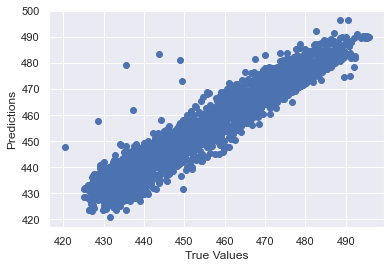

In [273]:
X_test02 = X_test[['Temperature','AmbientPressure','RelativeHumidity']].copy()

# Fit model
model02.fit(X_train02, y_train) 

# Predict using test dataset
y_pred = model02.predict(X_test02)

#visualize the prediction
plt.scatter(y_test,y_pred)

plt.xlabel('True Values')
plt.ylabel('Predictions')

##### Result:
The above figure shows a scatterplot for Predicted values vs. Actual values in the test dataset.
To have a good fit, the plot should resemble a straight line at 45 degrees. As you see from the above plot, all the points are close to the line.



#### 5. Use Statsmodels to rebuild model02 for P-value,  $R^2$, intercept, and coefficients.

In [274]:
X_train04 = X_train[['Temperature','AmbientPressure','RelativeHumidity']].copy()

X2 = sm.add_constant(X_train02)
# create a fitted model
est = sm.OLS(y_train, X2)
est2 = est.fit()
# displays a comprehensive table with statistical info generated by statsmodels
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 2.630e+04
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        15:37:34   Log-Likelihood:                -19711.
No. Observations:                6627   AIC:                         3.943e+04
Df Residuals:                    6623   BIC:                         3.946e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              475.9409     12.458  

##### Results:

1. P < .05 - these independent variables statistically significantly predicted electrical energy output, p < .05
2.  $R^2$ = .923 - all three variables explain 92.3% of the variability of the dependent variable
3. $\beta_0 $ (intercept) = 475.9409
4. $\beta_1 $ (coefficient of Temperature) = -2.3718
5. $\beta_2 $ (coefficient of AmbientPressure) = 0.0396
6. $\beta_3 $ (coefficient of RelativeHumidity) = -0.2059

#### 6.Using the final Model for Prediction

##### 1) Manually calculate the prediction

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

In this case:

$y = \beta_0 + \beta_1 \times Temperature + \beta_2 \times AmbientPressure + \beta_3 \times RelativeHumidity$

> ## **Final Model:**

>$Energy Output = 475.94 - 2.3718 \times Temperature + 0.0396 \times AmbientPressure - 0.2059 \times RelativeHumidity$


##### 2) Scikit-learn Prediction example

In [ ]:
# define one new instance
Xnew = [[Temperature_new, AmbientPressure_new, RelativeHumidity_new]]

# predict for a new observation
ynew = model_total.predict(X_new)


***
### Conclusion:

#### Research Question: To what extent does independent variables predict the net hourly electrical energy output of the Plant ?

A multiple linear regression was run to predict electrical energy output of the Plant from Temperature, Ambient Pressure, and Relative Humidity. These variables statistically significantly predicted electrical energy output, p < .05, $R^2$ = .923. All three variables explain 92.3% of the variability of the dependent variable - electrical energy output.

Ambient Temperature and Relative Humidity are negatively correlated with the electrical energy output.
Electrical energy output is reduced when the temperature is getting higher, because the air flow speed is reduced on a hot day. When the relative humidity increases, the air flow rate will decrease which would reduce the net energy output.

Ambient pressure is positively correlated with the electrical energy output. More the ambient pressure more the air flow rate, which will positively affect the energy output effciency.


Overall, Ambient Temperature is the most important variable for this linear model.